# Importing the required packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

Importing the data

In [5]:
df=pd.read_csv('dropout_train.csv')

In [6]:
df

,enrollment_id,username,course_id,n_videos,n_navigate,n_access,n_problem,n_page_close,n_discussion,n_wiki,n_events,n_events_lst_wk,n_access_lst_wk,n_access_lst2_wk,days_course_strt_access1,days_course_end_access_lst,unique_days_accessed,median_days_acs1_mod_rls,median_days_acslst_mod_rls,dropout
0,1,9Uee7oEuuMmgPx2IzPfFkWgkHZyPbWr0,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,29,25,107,87,66,0,0,314,111,34,87,2.0,0.0,14,1.0,7.0,0
1,3,1qXC7Fjbwp66GPQc6pHLfEuO8WKozxG4,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,9,14,79,148,22,26,0,298,95,28,43,0.0,1.0,9,7.0,9.0,0
2,4,FIHlppZyoq8muPbdVxS44gfvceX9zvU7,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,4,15,64,6,10,0,0,99,0,0,14,3.0,9.0,9,4.0,10.5,0
3,5,p1Mp7WkVfzUijX0peVQKSHbgd5pXyl4c,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,86,30,226,189,87,34,0,652,197,63,83,2.0,0.0,11,7.0,15.0,0
4,6,dpK33RH9yepUAnyoywRwBt1AJzxGlaja,AXUJZGmZ0xaYSWazu8RQ1G5c76ECT1Kd,2,5,12,2,2,0,0,23,23,12,12,27.0,1.0,2,203.0,203.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96418,200897,M2R4IY0V8T0jxOaASirvYDTUV5jV2Rus,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J,0,1,0,0,0,0,0,1,0,0,0,NaN,NaN,1,NaN,NaN,1
96419,200900,y6i20DJpIul6LihHwgZcWxbdAap5GcBP,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J,0,1,0,0,0,0,0,1,0,0,0,NaN,NaN,1,NaN,NaN,1
96420,200901,PPEydg4GXh52QanXuUYKbv8ENUSViBbd,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J,1,2,3,0,2,0,0,8,0,0,3,21.0,8.0,1,21.0,21.0,1
96421,200904,7k4xZXZirLFjbh80SpWNqJdTubgGglfv,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J,0,1,0,0,0,0,0,1,0,0,0,NaN,NaN,1,NaN,NaN,1


In [7]:
df1=pd.read_csv('dropout_test.csv')

In [8]:
df1

,enrollment_id,username,course_id,n_videos,n_navigate,n_access,n_problem,n_page_close,n_discussion,n_wiki,n_events,n_events_lst_wk,n_access_lst_wk,n_access_lst2_wk,days_course_strt_access1,days_course_end_access_lst,unique_days_accessed,median_days_acs1_mod_rls,median_days_acslst_mod_rls,dropout
0,9,J1oRHoSJOInehnrxVdh32dK7QnDuCJWo,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,2,12,71,6,6,0,0,97,61,45,71,17.0,3.0,6,16.0,17.0,1
1,28,BoK7CAUaCFqnLgmWLxeOHg8YkXUSeCtc,TAYxxh39I2LZnftBpL0LfF2NxzrCKpkx,21,11,45,12,16,0,0,105,0,0,3,5.0,8.0,6,7.0,14.0,1
2,32,Jm4nQ05ndX10jbofbWx6S0r9VXrqia6S,AXUJZGmZ0xaYSWazu8RQ1G5c76ECT1Kd,1,9,27,13,16,7,0,73,58,20,27,18.0,0.0,5,11.5,18.0,0
3,46,hnewTKKnZRwEeXEZu9RmHHva1PDybMo2,KHPw0gmg1Ad3V07TqRpyBzA8mRjj7mkt,0,1,0,0,0,0,0,1,0,0,0,NaN,NaN,1,NaN,NaN,1
4,48,1ELMItXjpijnCZU4WKxvrVri8AjkR2gf,AXUJZGmZ0xaYSWazu8RQ1G5c76ECT1Kd,27,15,70,18,41,0,1,172,98,37,37,13.0,1.0,5,166.0,172.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24114,200860,9nSUuUWu5HNDbCrFPMSa4E0asUuM7lBR,mTmmr5zd8l4wXhwiULwjSmSbi9ktcFmV,0,1,0,0,0,0,0,1,1,0,0,NaN,NaN,1,NaN,NaN,1
24115,200861,FVlbYQVV5WHtANfNywM7MqQTm6x5MZoy,mTmmr5zd8l4wXhwiULwjSmSbi9ktcFmV,0,2,0,0,0,0,0,2,2,0,0,NaN,NaN,1,NaN,NaN,1
24116,200880,BYvr8HwjIxIO9D11YRvidM8mXBtvCkAI,mTmmr5zd8l4wXhwiULwjSmSbi9ktcFmV,0,2,2,0,0,0,1,5,5,2,2,28.0,1.0,1,NaN,NaN,0
24117,200895,DZjg6cB77aqoen6Ol57HJ5qtVHbTRPJ6,9zpXzW9zCfU8KGBWkhlsGH8B8czISH4J,0,1,0,0,0,0,0,1,0,0,0,NaN,NaN,1,NaN,NaN,1


### a) Analyze the data

In [9]:
df.corr()

C:\Users\yasht\AppData\Local\Temp\ipykernel_7276\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,n_videos,n_navigate,n_access,n_problem,n_page_close,n_discussion,n_wiki,n_events,n_events_lst_wk,n_access_lst_wk,n_access_lst2_wk,days_course_strt_access1,days_course_end_access_lst,unique_days_accessed,median_days_acs1_mod_rls,median_days_acslst_mod_rls,dropout
n_videos,1.000000,0.605246,0.799883,0.614692,0.819636,0.291452,0.196296,0.827623,0.646041,0.628296,0.693042,-0.171350,-0.363429,0.667484,-0.017267,-0.003977,-0.419717
n_navigate,0.605246,1.000000,0.718027,0.488849,0.709246,0.499179,0.393316,0.803644,0.565011,0.521418,0.592772,-0.219736,-0.381726,0.779440,-0.077001,-0.061041,-0.458008
n_access,0.799883,0.718027,1.000000,0.672581,0.789888,0.357177,0.236856,0.923158,0.669930,0.701827,0.857468,-0.200954,-0.399386,0.754634,-0.056144,-0.039738,-0.463098
n_problem,0.614692,0.488849,0.672581,1.000000,0.523621,0.244517,0.142953,0.765030,0.587220,0.510619,0.575371,-0.147126,-0.277761,0.528257,-0.038411,-0.028596,-0.332043
n_page_close,0.819636,0.709246,0.789888,0.523621,1.000000,0.329097,0.244055,0.829678,0.636740,0.616018,0.680657,-0.206898,-0.421527,0.760248,-0.059172,-0.042475,-0.488868
n_discussion,0.291452,0.499179,0.357177,0.244517,0.329097,1.000000,0.402739,0.599224,0.393654,0.237985,0.275311,-0.094804,-0.132415,0.369239,-0.040908,-0.035569,-0.175558
n_wiki,0.196296,0.393316,0.236856,0.142953,0.244055,0.402739,1.000000,0.355021,0.219965,0.160916,0.193903,-0.070961,-0.114692,0.261787,-0.026053,-0.022321,-0.152814
n_events,0.827623,0.803644,0.923158,0.765030,0.829678,0.599224,0.355021,1.000000,0.729948,0.671745,0.781968,-0.211849,-0.400200,0.783341,-0.061290,-0.045507,-0.471502
n_events_lst_wk,0.646041,0.565011,0.669930,0.587220,0.636740,0.393654,0.219965,0.729948,1.000000,0.936158,0.760249,0.035229,-0.451590,0.556130,-0.016747,-0.006617,-0.436475
n_access_lst_wk,0.628296,0.521418,0.701827,0.510619,0.616018,0.237985,0.160916,0.671745,0.936158,1.000000,0.804827,0.036949,-0.457931,0.549625,-0.012621,-0.001695,-0.437363


In [10]:
df.dtypes

enrollment_id                  object
username                       object
course_id                      object
n_videos                        int64
n_navigate                      int64
n_access                        int64
n_problem                       int64
n_page_close                    int64
n_discussion                    int64
n_wiki                          int64
n_events                        int64
n_events_lst_wk                 int64
n_access_lst_wk                 int64
n_access_lst2_wk                int64
days_course_strt_access1      float64
days_course_end_access_lst    float64
unique_days_accessed            int64
median_days_acs1_mod_rls      float64
median_days_acslst_mod_rls    float64
dropout                         int64
dtype: object

In [11]:
df.describe()

,n_videos,n_navigate,n_access,n_problem,n_page_close,n_discussion,n_wiki,n_events,n_events_lst_wk,n_access_lst_wk,n_access_lst2_wk,days_course_strt_access1,days_course_end_access_lst,unique_days_accessed,median_days_acs1_mod_rls,median_days_acslst_mod_rls,dropout
count,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,96423.000000,73118.000000,73118.000000,96423.000000,58422.000000,58422.000000,96423.000000
mean,6.641610,8.401678,25.845898,10.677100,10.272155,5.412941,0.753907,68.005289,16.090072,6.363005,12.303361,8.821795,13.415397,2.671437,23.667976,25.274811,0.792425
std,14.739324,13.003143,54.421452,34.805827,20.678729,36.838298,4.006820,140.169147,49.475405,19.487712,33.462445,8.447732,9.683811,3.109517,59.918248,59.625010,0.405573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-185.000000,-185.000000,0.000000
25%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,3.500000,5.500000,1.000000
50%,1.000000,4.000000,6.000000,0.000000,2.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,6.000000,13.000000,1.000000,9.500000,12.000000,1.000000
75%,6.000000,10.000000,26.000000,6.000000,10.000000,2.000000,1.000000,68.000000,6.000000,2.000000,9.000000,15.000000,22.000000,3.000000,21.000000,22.000000,1.000000
max,399.000000,649.000000,3659.000000,1046.000000,400.000000,4360.000000,554.000000,5289.000000,1554.000000,655.000000,3659.000000,29.000000,29.000000,30.000000,379.000000,379.000000,1.000000


In [12]:
df.isnull()

,enrollment_id,username,course_id,n_videos,n_navigate,n_access,n_problem,n_page_close,n_discussion,n_wiki,n_events,n_events_lst_wk,n_access_lst_wk,n_access_lst2_wk,days_course_strt_access1,days_course_end_access_lst,unique_days_accessed,median_days_acs1_mod_rls,median_days_acslst_mod_rls,dropout
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96418,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False
96419,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False
96420,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96421,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False


### b) Curate the data

In [13]:
df.isnull().sum()

enrollment_id                     1
username                          0
course_id                         0
n_videos                          0
n_navigate                        0
n_access                          0
n_problem                         0
n_page_close                      0
n_discussion                      0
n_wiki                            0
n_events                          0
n_events_lst_wk                   0
n_access_lst_wk                   0
n_access_lst2_wk                  0
days_course_strt_access1      23305
days_course_end_access_lst    23305
unique_days_accessed              0
median_days_acs1_mod_rls      38001
median_days_acslst_mod_rls    38001
dropout                           0
dtype: int64

In [14]:
df['days_course_strt_access1'].fillna(value = df['days_course_strt_access1'].mean(), inplace = True)

In [15]:
df['days_course_end_access_lst'].fillna(value = df['days_course_end_access_lst'].mean(), inplace = True)
df['median_days_acs1_mod_rls'].fillna(value = df['median_days_acs1_mod_rls'].mean(), inplace = True)
df['median_days_acslst_mod_rls'].fillna(value = df['median_days_acslst_mod_rls'].mean(), inplace = True)

In [16]:
df.dropna(how = 'any', inplace = True)

In [17]:
df.isnull().sum()

enrollment_id                 0
username                      0
course_id                     0
n_videos                      0
n_navigate                    0
n_access                      0
n_problem                     0
n_page_close                  0
n_discussion                  0
n_wiki                        0
n_events                      0
n_events_lst_wk               0
n_access_lst_wk               0
n_access_lst2_wk              0
days_course_strt_access1      0
days_course_end_access_lst    0
unique_days_accessed          0
median_days_acs1_mod_rls      0
median_days_acslst_mod_rls    0
dropout                       0
dtype: int64

In [18]:
df1.isnull().sum()

enrollment_id                    0
username                         0
course_id                        0
n_videos                         0
n_navigate                       0
n_access                         0
n_problem                        0
n_page_close                     0
n_discussion                     0
n_wiki                           0
n_events                         0
n_events_lst_wk                  0
n_access_lst_wk                  0
n_access_lst2_wk                 0
days_course_strt_access1      5867
days_course_end_access_lst    5867
unique_days_accessed             0
median_days_acs1_mod_rls      9685
median_days_acslst_mod_rls    9685
dropout                          0
dtype: int64

In [19]:
df1['days_course_strt_access1'].fillna(value = df1['days_course_strt_access1'].mean(), inplace = True)
df1['days_course_end_access_lst'].fillna(value = df1['days_course_end_access_lst'].mean(), inplace = True)
df1['median_days_acs1_mod_rls'].fillna(value = df1['median_days_acs1_mod_rls'].mean(), inplace = True)
df1['median_days_acslst_mod_rls'].fillna(value = df1['median_days_acslst_mod_rls'].mean(), inplace = True)

In [20]:
df.isnull().sum()

enrollment_id                 0
username                      0
course_id                     0
n_videos                      0
n_navigate                    0
n_access                      0
n_problem                     0
n_page_close                  0
n_discussion                  0
n_wiki                        0
n_events                      0
n_events_lst_wk               0
n_access_lst_wk               0
n_access_lst2_wk              0
days_course_strt_access1      0
days_course_end_access_lst    0
unique_days_accessed          0
median_days_acs1_mod_rls      0
median_days_acslst_mod_rls    0
dropout                       0
dtype: int64

### c) Building models

In [21]:
X_train  = df.drop(['enrollment_id', 'username', 'course_id', 'dropout'], axis = 1)

In [22]:
y_train = df['dropout']

In [23]:
X_test = df1.drop(['enrollment_id', 'username', 'course_id', 'dropout'], axis = 1)

In [24]:
y_test = df1['dropout']

1. Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier(n_estimators = 300, criterion = 'entropy')

In [27]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
result = rf.predict(X_test)
accuracy_score(y_test, result)

0.875865500228036

2. Gradient Boost

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
gbm = GradientBoostingClassifier(loss = 'log_loss')

In [32]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [33]:
result = gbm.predict(X_test)
accuracy_score(y_test, result)

0.8789750818856503

3. XGBoost

In [34]:
from xgboost import XGBClassifier

In [35]:
xgb = XGBClassifier(booster = 'gblinear')

In [36]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=-1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [38]:
result = xgb.predict(X_test)
accuracy_score(y_test, result)

0.8742070566773084

4. Multilayer perceptron

In [39]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [40]:
mp_model = Sequential()

mp_model.add(Dense(10, input_shape = (16,), activation = 'relu'))
mp_model.add(Dense(10, activation = 'relu'))
mp_model.add(Dense(10, activation = 'relu'))
mp_model.add(Dense(2, activation = 'softmax'))

In [41]:
mp_model.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['accuracy', 'mse'])

In [42]:
mp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                170       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 412
Trainable params: 412
Non-trainable params: 0
_________________________________________________________________


In [43]:
mp_model.fit(X_train,
            y_train,
            batch_size= 100,
            epochs = 20,
            verbose = 1)

Epoch 1/20
965/965 [==============================] - 7s 5ms/step - loss: 0.2957 - accuracy: 0.5211 - mse: 0.2957
Epoch 2/20
965/965 [==============================] - 5s 5ms/step - loss: 0.2544 - accuracy: 0.4696 - mse: 0.2544
Epoch 3/20
965/965 [==============================] - 5s 5ms/step - loss: 0.2512 - accuracy: 0.4677 - mse: 0.2512
Epoch 4/20
965/965 [==============================] - 4s 4ms/step - loss: 0.2505 - accuracy: 0.5303 - mse: 0.2505
Epoch 5/20
965/965 [==============================] - 5s 5ms/step - loss: 0.2503 - accuracy: 0.5230 - mse: 0.2503
Epoch 6/20
965/965 [==============================] - 4s 4ms/step - loss: 0.2502 - accuracy: 0.5005 - mse: 0.2502
Epoch 7/20
965/965 [==============================] - 5s 5ms/step - loss: 0.2502 - accuracy: 0.5258 - mse: 0.2502
Epoch 8/20
965/965 [==============================] - 5s 5ms/step - loss: 0.2502 - accuracy: 0.5365 - mse: 0.2502
Epoch 9/20
965/965 [==============================] - 4s 5ms/step - loss: 0.2501 - accur

In [44]:
mp_result = mp_model.evaluate(X_test, y_test)

754/754 [==============================] - 3s 4ms/step - loss: 0.2501 - accuracy: 0.4316 - mse: 0.2501


In [45]:
print(mp_model.metrics_names)
print(mp_result)

['loss', 'accuracy', 'mse']
[0.2500527799129486, 0.4316099286079407, 0.2500527799129486]


### d) Identify top 5 important preditors and visualize the importance scores

In [46]:
rf.feature_importances_

array([0.04779161, 0.05772865, 0.08758937, 0.04619866, 0.05313824,
       0.03379897, 0.01899885, 0.11976103, 0.0721129 , 0.05558546,
       0.10814765, 0.0415191 , 0.06797073, 0.09607147, 0.04646136,
       0.04712594])

In [47]:
features_importances = pd.Series(rf.feature_importances_, index = X_train.columns)

In [48]:
features_importances.sort_values(ascending = False).head()

n_events                0.119761
n_access_lst2_wk        0.108148
unique_days_accessed    0.096071
n_access                0.087589
n_events_lst_wk         0.072113
dtype: float64

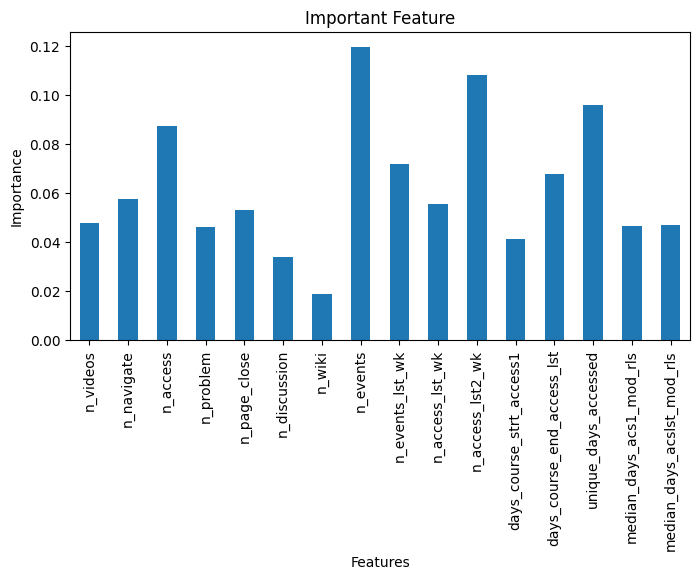

In [49]:
fig = plt.figure(figsize = (8,4), dpi = 100)
features_importances.plot.bar()
plt.title('Important Feature')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [50]:
import joblib

In [51]:
joblib.dump(rf,'rf.joblib')

['rf.joblib']

In [52]:
joblib.dump(gbm,'gbm.joblib')

['gbm.joblib']

In [54]:
joblib.dump(xgb,'xgb.joblib')

['xgb.joblib']

In [55]:
joblib.dump(mp_model,'mp_model.joblib')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...metrics\mean_metric_wrapper_1
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-12-23 22:58:01         2253
metadata.json                                  2022-12-23 22:58:01           64
variables.h5                                   2022-12-23 22:58:01        29624


['mp_model.joblib']

In [56]:
RF = joblib.load('rf.joblib')

In [62]:
predic_rf = RF.predict(X_test)
accuracy_score(predic_rf,y_test)

0.875865500228036

In [57]:
GB = joblib.load('gbm.joblib')

In [63]:
predic_gb = GB.predict(X_test)
accuracy_score(predic_gb,y_test)

0.8789750818856503

In [58]:
XGB = joblib.load('xgb.joblib')

In [64]:
predic_xgb = XGB.predict(X_test)
accuracy_score(predic_xgb,y_test)

0.8742070566773084

In [59]:
MLP = joblib.load('mp_model.joblib')

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2022-12-23 22:58:00         2253
metadata.json                                  2022-12-23 22:58:00           64
variables.h5                                   2022-12-23 22:58:00        29624
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...metrics\mean_metric_wrapper_1
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars


In [66]:
mp_result = MLP.evaluate(X_test, y_test)

754/754 [==============================] - 4s 4ms/step - loss: 0.2501 - accuracy: 0.4316 - mse: 0.2501


In [67]:
print(mp_model.metrics_names)
print(mp_result)

['loss', 'accuracy', 'mse']
[0.2500527799129486, 0.4316099286079407, 0.2500527799129486]


Analyze the result

->Performance of the all the models are efficient in test data rather than of train data. 
->After performing hyperparameter tunning there is not so much difference in accuracy. 
->Out of all the model the most efficient model is Gradient Boost model with 0.8789 accuracy.